In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
portfolio3 = pd.read_csv('estaticos_portfolio3.csv')
market_encoded = pd.read_csv('market_clean_enconded.csv')
portfolio1 = pd.read_csv('estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('estaticos_portfolio2.csv')


In [6]:
portfolio1 = portfolio1.drop(['Unnamed: 0'], axis = 1)
portfolio2 = portfolio2.drop(['Unnamed: 0'], axis = 1)
portfolio3 = portfolio3.drop(['Unnamed: 0'], axis = 1)

In [7]:
print('Shape do Portfolio1 é', portfolio1.shape)
print('Shape do Portfolio2 é', portfolio2.shape)
print('Shape do Portfolio3 é', portfolio3.shape)
print('Shape do Market é', market_encoded.shape)

Shape do Portfolio1 é (555, 181)
Shape do Portfolio2 é (566, 1)
Shape do Portfolio3 é (265, 1)
Shape do Market é (462298, 40)


## Analisando se os ids estão presentes nos 3 portfólios, se está só em 2 ou só em 1 portfólio

In [8]:
port1 = list(portfolio1['id'])
port2 = list(portfolio2['id'])
port3 = list(portfolio3['id'])

In [9]:
port1_port2 = [x for x in port1 if x in port2]
port1_port3 = [x for x in port1 if x in port3]
port2_port3 = [x for x in port2 if x in port3]
port1_port2_port3 = [x for x in port1 if x in port2 and port3]

In [10]:
print(f"Port1 and Port2: {len(port1_port2)}")
print(f"Port1 and Port3: {len(port1_port3)}")
print(f"Port2 and Port3: {len(port2_port3)}")
print(f"Port1, Port2 and Port3: {len(port1_port2_port3)}")

Port1 and Port2: 0
Port1 and Port3: 0
Port2 and Port3: 108
Port1, Port2 and Port3: 0


# Pegando os ids do Market que não estão em nenhum portfólio

In [32]:
just_market = pd.read_csv('merge_not.csv')

In [34]:
just_market.head()

,Unnamed: 0,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
0,0,1,14.457534,0,0,0,0,0,1,1,...,10,19,4,0,0,6,48,2,2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,1,1,1.463014,0,0,1,0,0,1,1,...,3,16,2,1,1,4,69,10,10,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,2,1,7.093151,0,0,1,0,0,0,1,...,20,2,0,0,2,2,43,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,3,1,6.512329,0,0,0,0,0,1,1,...,17,2,0,0,2,2,43,10,10,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,4,1,3.200000,0,0,0,0,0,1,1,...,8,19,4,0,0,6,48,10,10,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [35]:
just_market = just_market.drop(['Unnamed: 0'], axis = 1)

# Merge nos portfólios 2 e 3 com o market

In [39]:
df_portfolio2 = pd.merge(portfolio2, market_encoded, on='id')
df_portfolio3 = pd.merge(portfolio3, market_encoded, on='id')

# Portfólio 1

#### Tirando uma amostra do portfólio 1 para depois colocar na base de teste para verificar se serão recomendados para o portfólio 1

In [19]:
df_portfolio1 = pd.merge(portfolio1.id, market_encoded, on='id')

In [20]:
df_portfolio1.shape

(555, 40)

In [28]:
df_portfolio1_part = df_portfolio1.iloc[0:490]

In [31]:
amostra_port1 = df_portfolio1[490:]

## Colocando uma coluna de target 1 para os que são do portfólio 1

In [40]:
df_portfolio1_part_target = df_portfolio1_part.copy()

In [41]:
df_portfolio1_part_target['Target'] = 1

In [42]:
df_portfolio1_part_target.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,1,0.646575,0,0,1,0,0,0,0,...,9,16,2,4,1,14,61,10,10,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,0,6.586301,0,0,0,0,0,1,1,...,9,9,4,0,2,3,44,10,7,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,1,8.010959,0,0,1,0,0,0,0,...,9,9,1,0,2,8,0,1,1,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1,20.863014,0,0,0,0,0,0,0,...,9,19,4,0,0,11,70,1,1,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,1,18.726027,0,0,0,0,0,1,1,...,9,19,4,0,0,6,48,2,8,1


## Colocando alguns dados dentro do portfólio 1 que serão uma target 0 (não serão do portfólio 1)

### Vamos utilizar o portfólio2 para treinar com o portfólio 1. Para isso vou colocar a target 0 para o portfólio 2

In [43]:
df_portfolio2_target = df_portfolio2.copy()

In [44]:
df_portfolio2_target['Target'] = 0

In [45]:
df_portfolio2_target.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,09e95c1a84049001d086470a8f320a19b076f955a89122...,1,11.243836,0,0,0,0,0,1,1,...,0,0,4,0,0,17,57,6,6,0
1,dc9d155f5bcd3172031e2ec9431786e8871ff4b0ff4728...,1,43.789041,0,0,0,0,0,0,0,...,0,19,4,0,0,0,1,4,4,0
2,16843c9ffb920170477118933798510d8d5f00f5c56c12...,1,16.389041,0,0,0,0,0,0,1,...,11,16,4,0,0,9,11,3,3,0
3,ff045934d90aab184dd15e66daf3b3c97193bda5449298...,1,39.671233,0,0,0,0,0,0,0,...,0,2,4,0,0,13,6,4,4,0
4,a0ce528caab2c62497a548d0ebd9e935143ef81ed7dbf0...,1,20.268493,0,0,0,0,0,0,0,...,1,19,4,0,0,11,47,3,3,0


### Concatenando os dois para que possam formar somente 1 dataframe

In [51]:
df_port1_port2 = pd.concat([df_portfolio1_part_target, df_portfolio2_target],axis=0)

In [52]:
df_port1_port2.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,1,0.646575,0,0,1,0,0,0,0,...,9,16,2,4,1,14,61,10,10,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,0,6.586301,0,0,0,0,0,1,1,...,9,9,4,0,2,3,44,10,7,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,1,8.010959,0,0,1,0,0,0,0,...,9,9,1,0,2,8,0,1,1,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,1,20.863014,0,0,0,0,0,0,0,...,9,19,4,0,0,11,70,1,1,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,1,18.726027,0,0,0,0,0,1,1,...,9,19,4,0,0,6,48,2,8,1


In [53]:
df_port1_port2.shape

(1056, 41)

# Colocando o index como Id

In [54]:
df_port1_port2_indexid = df_port1_port2.copy()

In [55]:
df_port1_port2_indexid.set_index('id', inplace=True)

In [58]:
df_port1_port2_indexid.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,Target
id,,,,,,,,,,,,,,,,,,,,,
dabe79bec87c88ae04e869bf6bd321ee5e1893cecf66255be9ea861a9e5841a9,1,0.646575,0,0,1,0,0,0,0,0,...,9,16,2,4,1,14,61,10,10,1
32e5f4e10932153a7ba869cb0386e7e02d49d2461046b866411556d2af150702,0,6.586301,0,0,0,0,0,1,1,0,...,9,9,4,0,2,3,44,10,7,1
a95d6f30bba445bd3d6b0c5b36f865b38ec01d1733609095d359649cfedf15d1,1,8.010959,0,0,1,0,0,0,0,1,...,9,9,1,0,2,8,0,1,1,1
6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e74532d5040fbc933b8,1,20.863014,0,0,0,0,0,0,0,0,...,9,19,4,0,0,11,70,1,1,1
f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc251dfe8d321e9e6de7f5,1,18.726027,0,0,0,0,0,1,1,1,...,9,19,4,0,0,6,48,2,8,1


## Analisando o balancemento das targets

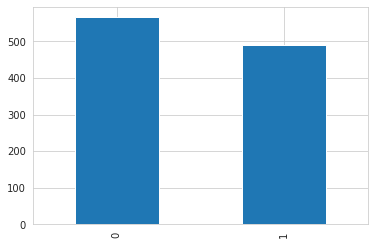

In [59]:
sns.set_style('whitegrid')
df_port1_port2_indexid['Target'].value_counts().plot(kind = 'bar')

In [60]:
#Criando o X e y
X = df_port1_port2_indexid.drop('Target', axis=1)
y = df_port1_port2_indexid['Target']

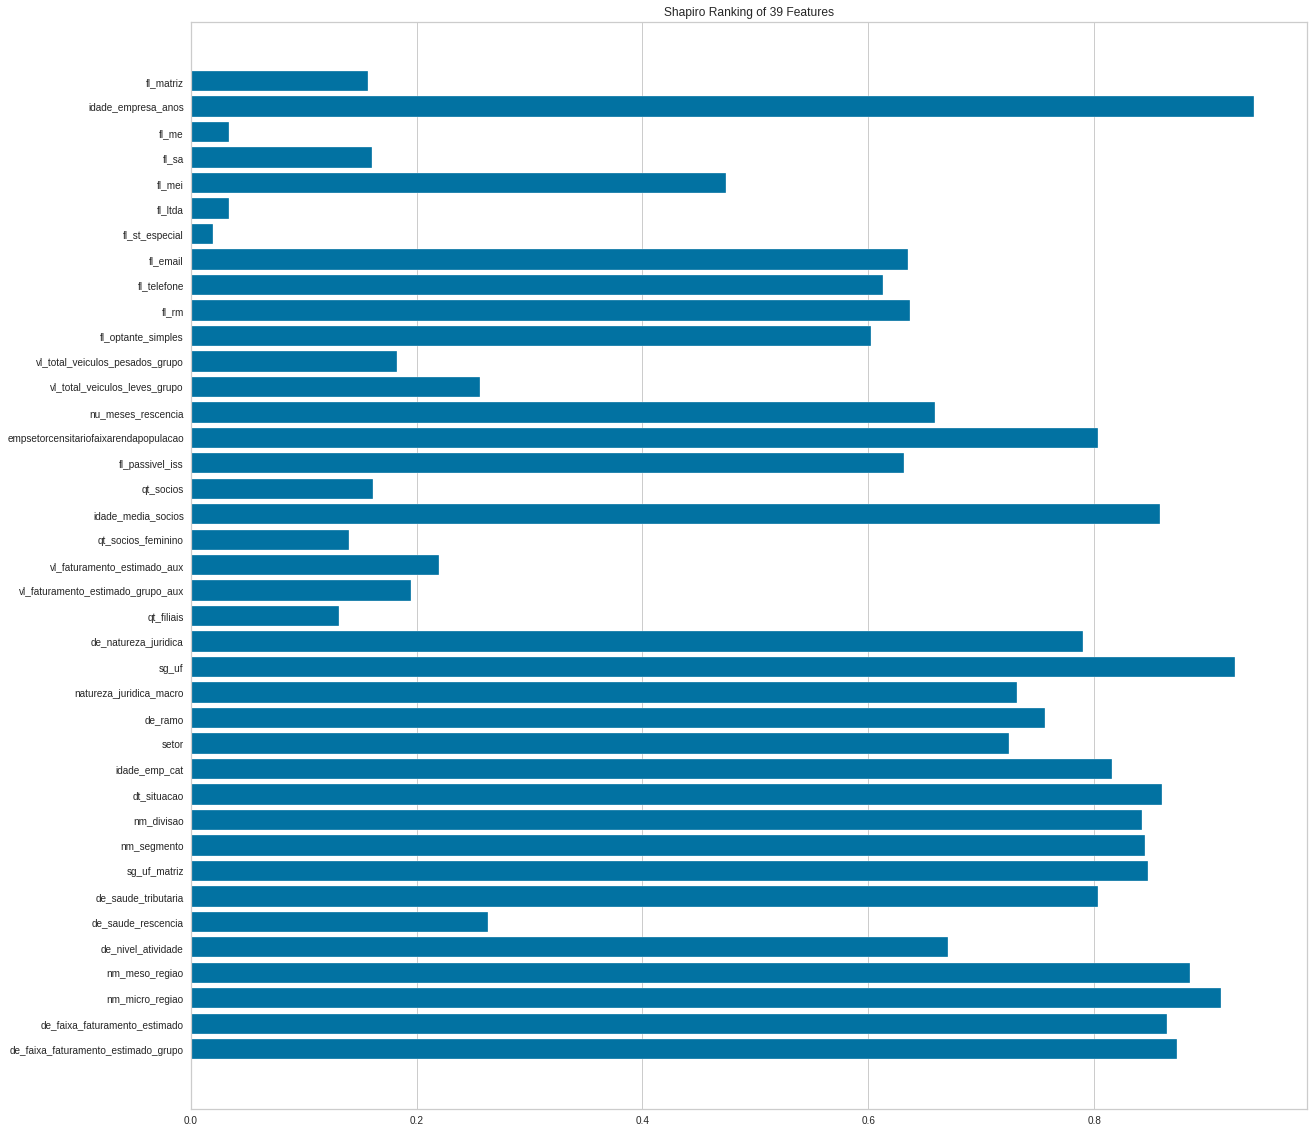

In [62]:
#Visualização da importancia das features usando Shapiro
from yellowbrick.features import Rank1D
# Criando o visualizador
visualizer = Rank1D(algorithm='shapiro')
plt.figure(figsize=(20,20))
visualizer.fit(X, y)           # Fit nos dados para o visualizer
visualizer.transform(X)        # Tranformando os dados
visualizer.show()              # Imprimindo as figuras

## Fazendo aprendizado supervisionado Classificação para aprender quem é do portfólio 1 e quem é do portfólio 2

### Separando a base em treino e teste

In [65]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
from tpot import TPOTClassifier

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [114]:
tp = TPOTClassifier(generations=10, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [115]:
tp.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 1.0
Generation 2 - Current best internal CV score: 1.0
Generation 3 - Current best internal CV score: 1.0
Generation 4 - Current best internal CV score: 1.0
Generation 5 - Current best internal CV score: 1.0
Generation 6 - Current best internal CV score: 1.0
Generation 7 - Current best internal CV score: 1.0
Generation 8 - Current best internal CV score: 1.0
Generation 9 - Current best internal CV score: 1.0
Generation 10 - Current best internal CV score: 1.0

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=7, min_samples_leaf=18, min_samples_split=17)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=10,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [72]:
#exportanod o modelo
tp.export('modelo.py')
with open('modelo.py') as pipe:
    print("".join(pipe.readlines()))

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.9988165680473372
exported_pipeline = DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_leaf=18, min_samples_split=17)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
exported_pipeline = DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_leaf=18, min_samples_split=17)

In [122]:
model = exported_pipeline.fit(X_train, y_train)
y_pred = exported_pipeline.predict(X_test)

## Curva ROC

/home/luiz/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


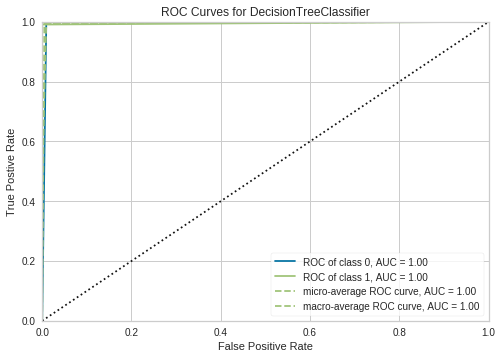

In [123]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [124]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      1.00       109

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [126]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[103,   0],
       [  1, 108]])

In [127]:
print("Acurácia (base de treinamento):", model.score(X_train, y_train))
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))

Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.9952830188679245


In [130]:
y_test.tail()

id
8bf9b8043991c418e97721eff8d2e84a72d69d237c9246133b3c01a057874a29    1
da2d92bb9537e68f2a2a849d202b5ec594fd2a7ea5331ec59ede2ab22f317089    0
9e3e4ebed442ded90bd38a5e75a7cc24acc849412a585e5dfa945a691da8aaf9    1
86e04ba79ab860c371af15b48019844e4447118fe7492d61638d9ce978dbf28b    1
a4391505b694dcdab1f808fe9028054a106d3df6054ec8f182613b0e178894e9    1
Name: Target, dtype: int64

In [129]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

## Prevendo agora no market com a amostra tirada também do portfólio 1

In [94]:
amostra_port1.head()

,id,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,...,nm_divisao,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo
490,7b31a8c2bf7011c7928cffb9f8225075e7ec2d638ce94e...,1,13.583562,0,0,0,0,0,0,0,...,30,9,20,3,0,1,19,73,10,10
491,aeb22f0dffd6635c319d3de4e465d045b827b1ae490d84...,1,6.706849,0,0,0,0,0,1,1,...,30,9,9,1,0,2,10,30,10,10
492,73af4232ce27d5eefab9ccf9c77b3678b3beab9d675852...,1,1.624658,0,0,1,0,0,1,1,...,30,9,19,2,1,2,6,48,10,10
493,37a308088cc7793d61413571e197ecf18e4b9fbc96fa88...,1,31.424658,0,0,0,0,0,0,0,...,30,9,2,4,0,0,2,23,10,10
494,a05a86ad99266c82bbb2a7019826ce2d8e64569cc3b4f5...,1,3.460274,0,0,0,0,0,1,1,...,30,9,9,4,0,0,8,0,2,2


In [97]:
amostra_port1_indexid = amostra_port1.copy()

In [98]:
amostra_port1_indexid.set_index('id', inplace=True)

In [99]:
amostra_port1_indexid.shape

(65, 39)

In [95]:
just_market.head()

,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,...,nm_segmento,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,nm_micro_regiao,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,id
0,1,14.457534,0,0,0,0,0,1,1,1,...,10,19,4,0,0,6,48,2,2,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...
1,1,1.463014,0,0,1,0,0,1,1,1,...,3,16,2,1,1,4,69,10,10,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...
2,1,7.093151,0,0,1,0,0,0,1,1,...,20,2,0,0,2,2,43,1,1,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...
3,1,6.512329,0,0,0,0,0,1,1,1,...,17,2,0,0,2,2,43,10,10,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...
4,1,3.200000,0,0,0,0,0,1,1,1,...,8,19,4,0,0,6,48,10,10,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...


In [100]:
just_market_indexid = just_market.copy()

In [101]:
just_market_indexid.set_index('id', inplace=True)

In [104]:
base_test_port1_port2 = pd.concat([amostra_port1_indexid, just_market_indexid],axis=0)

In [105]:
base_test_port1_port2.shape

(461085, 39)

In [107]:
X_test_base = base_test_port1_port2

In [131]:
y_pred_test = exported_pipeline.predict(X_test_base)

In [132]:
pd.DataFrame(y_pred_test)[0].value_counts()

1    458685
0      2400
Name: 0, dtype: int64